## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_26-31-05-23.csv', firstRow=528, lastRow=534)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_260523_S529-534.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=56s and ended at t=488s; mass=44.834950000000006g
This equals a volume of 44.925m; expected was 45.225mL; error is 0.664%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0003125 g/s^2


<IPython.core.display.Javascript object>


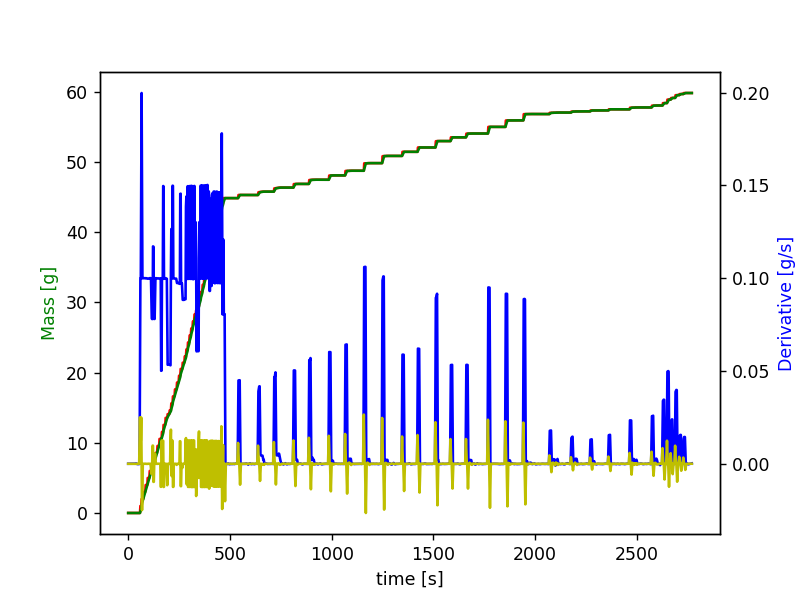

Addition of 0.449g Texapon SB 3 KC detected from 536s to 556s - expected volume = 0.835mL and actual volume = 0.403mL (resulting error is 51.792%)
Addition of 0.482g Plantacare 2000 detected from 634s to 672s - expected volume = 0.51mL and actual volume = 0.443mL (resulting error is 13.237%)
Addition of 0.577g Plantacare 2000 detected from 712s to 754s - expected volume = 0.51mL and actual volume = 0.529mL (resulting error is 3.777%)
Addition of 0.525g Dehyton MC detected from 808s to 836s - expected volume = 0.519mL and actual volume = 0.485mL (resulting error is 6.661%)
Addition of 0.6g Dehyton MC detected from 884s to 920s - expected volume = 0.519mL and actual volume = 0.554mL (resulting error is 6.643%)
Addition of 0.617g Dehyton PK 45 detected from 982s to 1012s - expected volume = 0.603mL and actual volume = 0.588mL (resulting error is 2.403%)
Addition of 0.669g Dehyton PK 45 detected from 1062s to 1100s - expected volume = 0.603mL and actual volume = 0.637mL (resulting error is

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.0015625 g/s and for 2nd derivative = 0.000390625 g/s^2


<IPython.core.display.Javascript object>


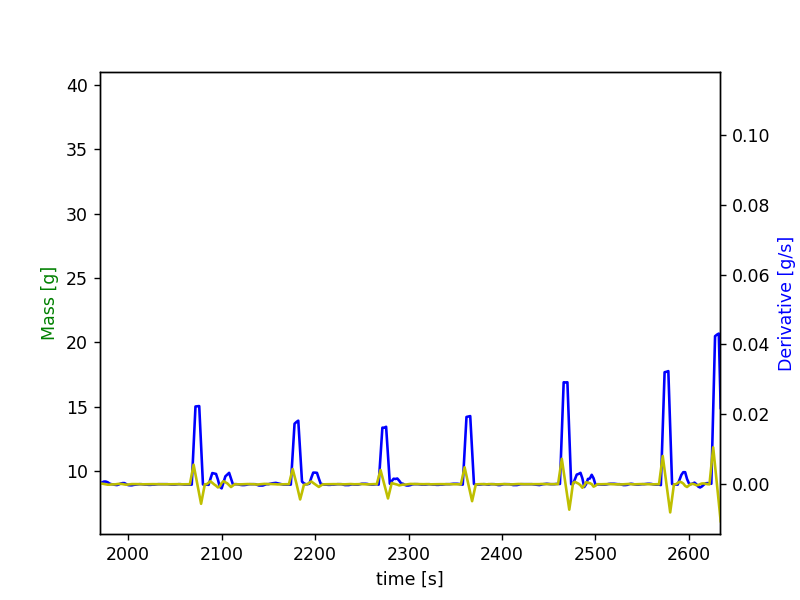

Addition of 0.218g Salcare Super 7 detected from 2066s to 2116s - expected volume = 0.268mL and actual volume = 0.196mL (resulting error is 26.726%)
Addition of 0.171g Salcare Super 7 detected from 2172s to 2210s - expected volume = 0.138mL and actual volume = 0.155mL (resulting error is 11.928%)
Addition of 0.144g Salcare Super 7 detected from 2266s to 2292s - expected volume = 0.112mL and actual volume = 0.129mL (resulting error is 15.1%)
Addition of 0.154g Salcare Super 7 detected from 2356s to 2374s - expected volume = 0.153mL and actual volume = 0.139mL (resulting error is 8.58%)
Addition of 0.271g Salcare Super 7 detected from 2460s to 2504s - expected volume = 0.252mL and actual volume = 0.243mL (resulting error is 3.603%)
Addition of 0.281g Salcare Super 7 detected from 2568s to 2602s - expected volume = 0.248mL and actual volume = 0.253mL (resulting error is 2.227%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2014,2112,2210,2314,2412,2494,2564])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


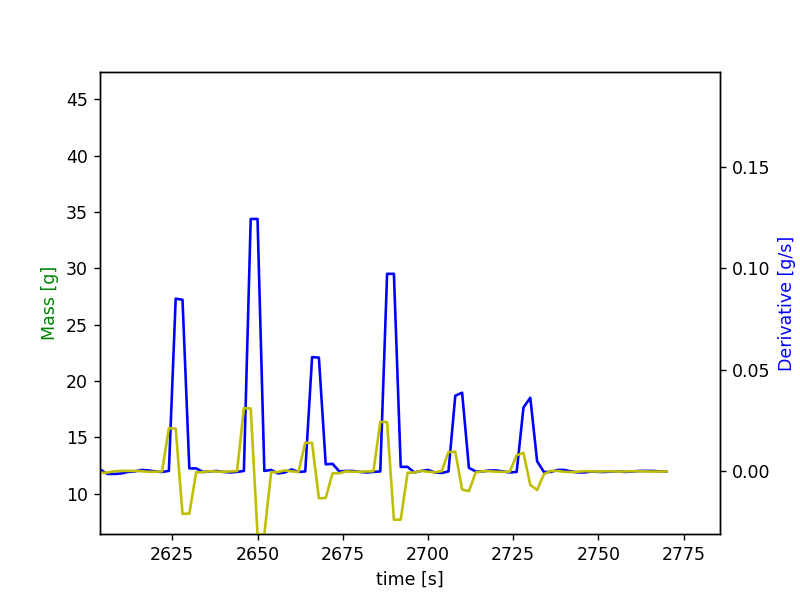

Addition of 0.345g Arlypon F detected from 2622s to 2634s - expected volume = 0.386mL and actual volume = 0.393mL (resulting error is 1.622%)
Addition of 0.496g Arlypon F detected from 2644s to 2656s - expected volume = 0.538mL and actual volume = 0.566mL (resulting error is 5.085%)
Addition of 0.24g Arlypon F detected from 2662s to 2674s - expected volume = 0.246mL and actual volume = 0.273mL (resulting error is 10.829%)
Addition of 0.396g Arlypon F detected from 2684s to 2696s - expected volume = 0.424mL and actual volume = 0.451mL (resulting error is 6.317%)
Addition of 0.153g Arlypon F detected from 2704s to 2716s - expected volume = 0.158mL and actual volume = 0.174mL (resulting error is 10.072%)
Addition of 0.145g Arlypon F detected from 2724s to 2738s - expected volume = 0.146mL and actual volume = 0.165mL (resulting error is 12.891%)


In [5]:
# default bl_mult = 1, default mergeSens = 1
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

#t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2780,2834,2844,2848,2862,2884,2906])

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_260523_S529-S534.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_36956\1558517848.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
528,529.0,4.708003,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,9.951458,0.0,0.0,0.0,0.0,2.280390,3.609853,0.0
529,530.0,0.000000,0.0,0.0,0.0,0.000000,11.06718,12.640904,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.683324,4.875496,0.0
530,531.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,10.639870,0.0,0.0,0.000000,9.138093,0.0,0.0,0.0,0.0,1.410366,2.357554,0.0
531,532.0,0.000000,0.0,0.0,0.0,10.521185,0.00000,0.000000,0.0,0.0,11.994985,0.000000,0.0,0.0,0.0,0.0,1.534381,3.927816,0.0
532,533.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,9.027234,8.862690,0.0,0.0,0.0,0.0,2.668906,1.507495,0.0
533,534.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,10.087251,0.0,0.0,10.595235,0.000000,0.0,0.0,0.0,0.0,2.751580,1.414329,0.0
